<a href="https://colab.research.google.com/github/iuri/opencv/blob/main/color_mapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt


from PIL import Image

# to mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd
pd.set_option('display.max_columns', None)

Mounted at /content/gdrive


Loop: 6360.635757446289 ms


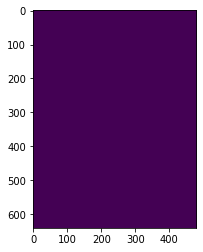

In [ ]:
# conversion from RGB to CMYK. results were not good. The later method presente better results.
import time

file_path = '/content/gdrive/MyDrive/MCTI/dataset/camera1/new/0002.png'
img = cv.imread(file_path)

B = img[:, :, 0]
G = img[:, :, 1]
R = img[:, :, 2]

B_ = np.copy(B) 
G_ = np.copy(G)
R_ = np.copy(R)

K = np.zeros_like(B) 
C = np.zeros_like(B) 
M = np.zeros_like(B) 
Y = np.zeros_like(B) 

ts = time.time()

for i in range(B.shape[0]):
    for j in range(B.shape[1]):
        B_[i, j] = B[i, j]/255
        G_[i, j] = G[i, j]/255
        R_[i, j] = R[i, j]/255

        K[i, j] = 1 - max(B_[i, j], G_[i, j], R_[i, j])
        if (B_[i, j] == 0) and (G_[i, j] == 0) and (R_[i, j] == 0):
        # black
              C[i, j] = 0
              M[i, j] = 0  
              Y[i, j] = 0
        else:
        
            C[i, j] = (1 - R_[i, j] - K[i, j])/float((1 - K[i, j]))
            M[i, j] = (1 - G_[i, j] - K[i, j])/float((1 - K[i, j]))
            Y[i, j] = (1 - B_[i, j] - K[i, j])/float((1 - K[i, j]))


CMYK = C + M + Y + K 
        
t = (time.time() -ts)
print("Loop: {:} ms".format(t*1000))


# displaying grascale image
plt.imshow(CMYK)
plt.show()

In [ ]:
# Comparing an image and its neighboor of the same camera.
# Left image paths
pathL = '/content/gdrive/MyDrive/MCTI/dataset/camera1/new/'
# Right image paths
pathR = '/content/gdrive/MyDrive/MCTI/dataset/camera2/new/'
print(os.listdir(pathL))
print(os.listdir(pathR))
# Potential fix 
# os.environ['OPENCV_IO_MAX_IMAGE_PIXELS']=str(2**64)

filenameL = pathL + '0021.png'
filenameR = pathR + '0021.png'

['0085.png', '1288.png', '2636.png', '3312.png', '0052.png', '1505.png', '2965.png', '2018.png', '0046.png', '1539.png', '2554.png', '2024.png', '1713.png', '1908.png', '1707.png', '1934.png', '2742.png', '0250.png', '2568.png', '2030.png', '2756.png', '1061.png', '2597.png', '3110.png', '1075.png', '3448.png', '0278.png', '0287.png', '2583.png', '3104.png', '0244.png', '1920.png', '0293.png', '2540.png', '3105.png', '2233.png', '1048.png', '1935.png', '0279.png', '0292.png', '1060.png', '2582.png', '1712.png', '1074.png', '3139.png', '2541.png', '2596.png', '3111.png', '3138.png', '2569.png', '2555.png', '1706.png', '1049.png', '2226.png', '2232.png', '2227.png', '0286.png', '2743.png', '2019.png', '2031.png', '1921.png', '0090.png', '3313.png', '1909.png', '1289.png', '3475.png', '3461.png', '1510.png', '3449.png', '0084.png', '1276.png', '3307.png', '1262.png', '1538.png', '0251.png', '0245.png', '2780.png', '2757.png', '1504.png', '2025.png', '2958.png', '2794.png', '1470.png', '29

In [ ]:
imgL = cv.imread(filenameL, cv.IMREAD_GRAYSCALE)
imgR = cv.imread(filenameR, cv.IMREAD_GRAYSCALE)
# print(imgL)
# print(imgR)

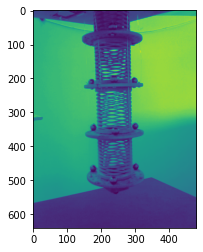

In [ ]:
# displaying grascale image
plt.imshow(imgL)
plt.show()

In [ ]:
# reading images as BGR, returns an error in the retrieve proecdure, disparity.
imgL = cv.imread(filenameL)
imgR = cv.imread(filenameR)

In [ ]:
filenameL = '/content/gdrive/MyDrive/MCTI/Bolsa/RGB/0021.png'
filenameR = '/content/gdrive/MyDrive/MCTI/Bolsa/RGB/0022.png'
# saving rgb image file
cv.imwrite(filenameL,imgL)
cv.imwrite(filenameR,imgR)

True

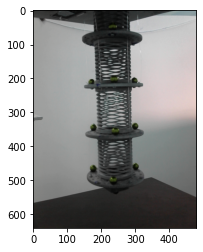

In [ ]:
# displaying BGR image sample
plt.imshow(imgL)
plt.show()

In [ ]:
# Converting to CMYK system
# https://stackoverflow.com/questions/69955216/convert-image-to-cmyk-and-split-the-channels-in-opencv
bgrdash_L = imgL.astype(float)/255.
K = 1 - np.max(bgrdash_L, axis=2)
C = (1-bgrdash_L[...,2] - K)/(1-K)
M = (1-bgrdash_L[...,1] - K)/(1-K)
Y = (1-bgrdash_L[...,0] - K)/(1-K)
CMYK_L = (np.dstack((C,M,Y,K)) * 255).astype(np.uint8)

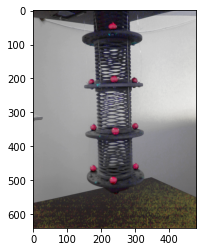

In [ ]:
plt.imshow(CMYK_L)
plt.show()

In [ ]:
from PIL import Image
imgData = np.frombuffer(CMYK_L.tobytes(), dtype='B')
invData = np.full(imgData.shape, 255, dtype='B')
invData -= imgData

print('MODE ', imgL.mode)
print('SIZE ', imgL.size)
print('BYTES ', invData.tobytes())

imgL = Image.frombytes(imgL.mode, imgL.size, invData.tobytes())
plt.imshow(imgL)
plt.show()

AttributeError: ignored

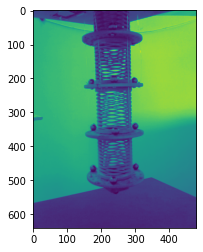

In [ ]:
# https://stackoverflow.com/questions/15026409/grayscale-cmyk-pixel
# Converting CMYK to RGB is cheap according to the formulas in http://www.easyrgb.com/index.php?X=MATH, 
# and then you can convert to grayscale using well known approaches. Supposing the c, m, y, and k in range [0, 1], we can convert it to grayscale luma as in:

def cmyk2gray(c, m, y, k):
    c = c * (1 - k) + k
    m = m * (1 - k) + k
    y = y * (1 - k) + k

    r, g, b = (1 - c), (1 - m), (1 - y)
    y = 0.299 * r + 0.587 * g + 0.114 * b
    return y

grayL = cmyk2gray(C,M,Y,K)
plt.imshow(grayL)
plt.show()

In [ ]:
bgrdash_R = imgR.astype(float)/255.
K = 1 - np.max(bgrdash_R, axis=2)
C = (1-bgrdash_R[...,2] - K)/(1-K)
M = (1-bgrdash_R[...,1] - K)/(1-K)
Y = (1-bgrdash_R[...,0] - K)/(1-K)
CMYK_R = (np.dstack((C,M,Y,K)) * 255).astype(np.uint8)

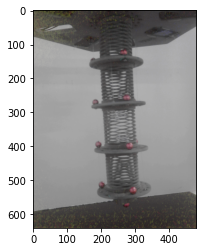

In [ ]:
# applied CMKY standard to the image 
plt.imshow(CMYK_R)
plt.show()

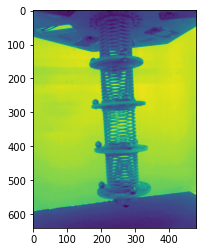

In [ ]:
grayR = cmyk2gray(C,M,Y,K)
plt.imshow(grayR)
plt.show()

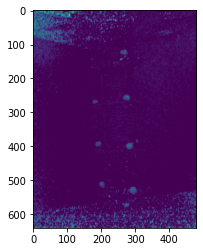

In [ ]:
# Use the cvtColor() function to grayscale the image
grayL = cv.cvtColor(CMYK_L, cv.COLOR_BGR2GRAY)
grayR = cv.cvtColor(CMYK_R, cv.COLOR_BGR2GRAY)
plt.imshow(grayR)
plt.show()

In [ ]:
# convert function must be CMYK2GRAY

In [ ]:
# saving CMYK image file
filenameL = '/content/gdrive/MyDrive/MCTI/Bolsa/CMYK/0021.png'
filenameR = '/content/gdrive/MyDrive/MCTI/Bolsa/CMYK/0022.png'
cv.imwrite(filenameL,CMYK_L)
cv.imwrite(filenameR,CMYK_R)

True

In [ ]:
imgL = cv.imread(filenameL)
imgR = cv.imread(filenameR)

In [ ]:
imgL = cv.imread(filenameL, cv.IMREAD_GRAYSCALE)
imgR = cv.imread(filenameR, cv.IMREAD_GRAYSCALE)

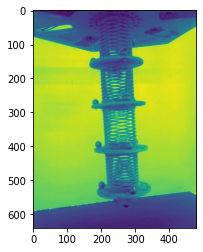

In [ ]:
plt.imshow(imgR)
plt.show()

In [ ]:
if CMYK_L == 'None' or CMYK_R == 'None':
  print("Image's empty!")
  print("Shapes: ", CMYK_L.shape, CMYK_R.shape)


<ipython-input-39-8496d3840cd6>:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if CMYK_L == 'None' or CMYK_R == 'None':


In [ ]:
if imgL == 'None' or imgR == 'None':
  print("Image's empty!")
  print("Shapes: ", imgL.shape, imgR.shape)


<ipython-input-40-15ee6467e16e>:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if imgL == 'None' or imgR == 'None':


In [ ]:
CMYK_L.size

1228800

In [ ]:
# imgR's shape has 3 dimensions, it must be 2 dimensions
# how would it be convert from (640, 480, 3) to (x, y)
CMYK_L.shape

(640, 480, 4)

In [ ]:
# imgR

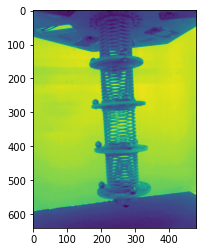